In [1]:
import pandas as pd
from pandas import read_csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 自定义读取数据
def read_data(path, col_index, col_name): 
    # path：路径
    # col_index：第几列（从0开始）
    # col_name：列名
    df = read_csv(path, usecols=[col_index], encoding='gbk')
    data = df[col_name]
    return df, data

In [3]:
# 可视化四个地震带的地震震级/能量折线图
def show( d1,d2, d3, d4):   
    fig = plt.figure(figsize=(30,40))
    ax1 = fig.add_subplot(411) # “411”表示“4×1网格，第一子图”
    ax1.set_title('ThePacificOcean', fontsize=15, color='b')
    ax1.plot(d1)
    ax2 = fig.add_subplot(412)
    ax2.set_title('QinghaiTibetPlateau', fontsize=15, color='b')
    ax2.plot(d2)
    ax3 = fig.add_subplot(413)
    ax3.set_title('NorthWest', fontsize=15, color='b')
    ax3.plot(d3)
    ax4 = fig.add_subplot(414)
    ax4.set_title('NorthChina', fontsize=15, color='b')
    ax4.plot(d4)
    plt.show()

data_ThePacificOcean:612
data_QinghaiTibetPlateau:646
data_NorthWest:283
data_NorthChina:62


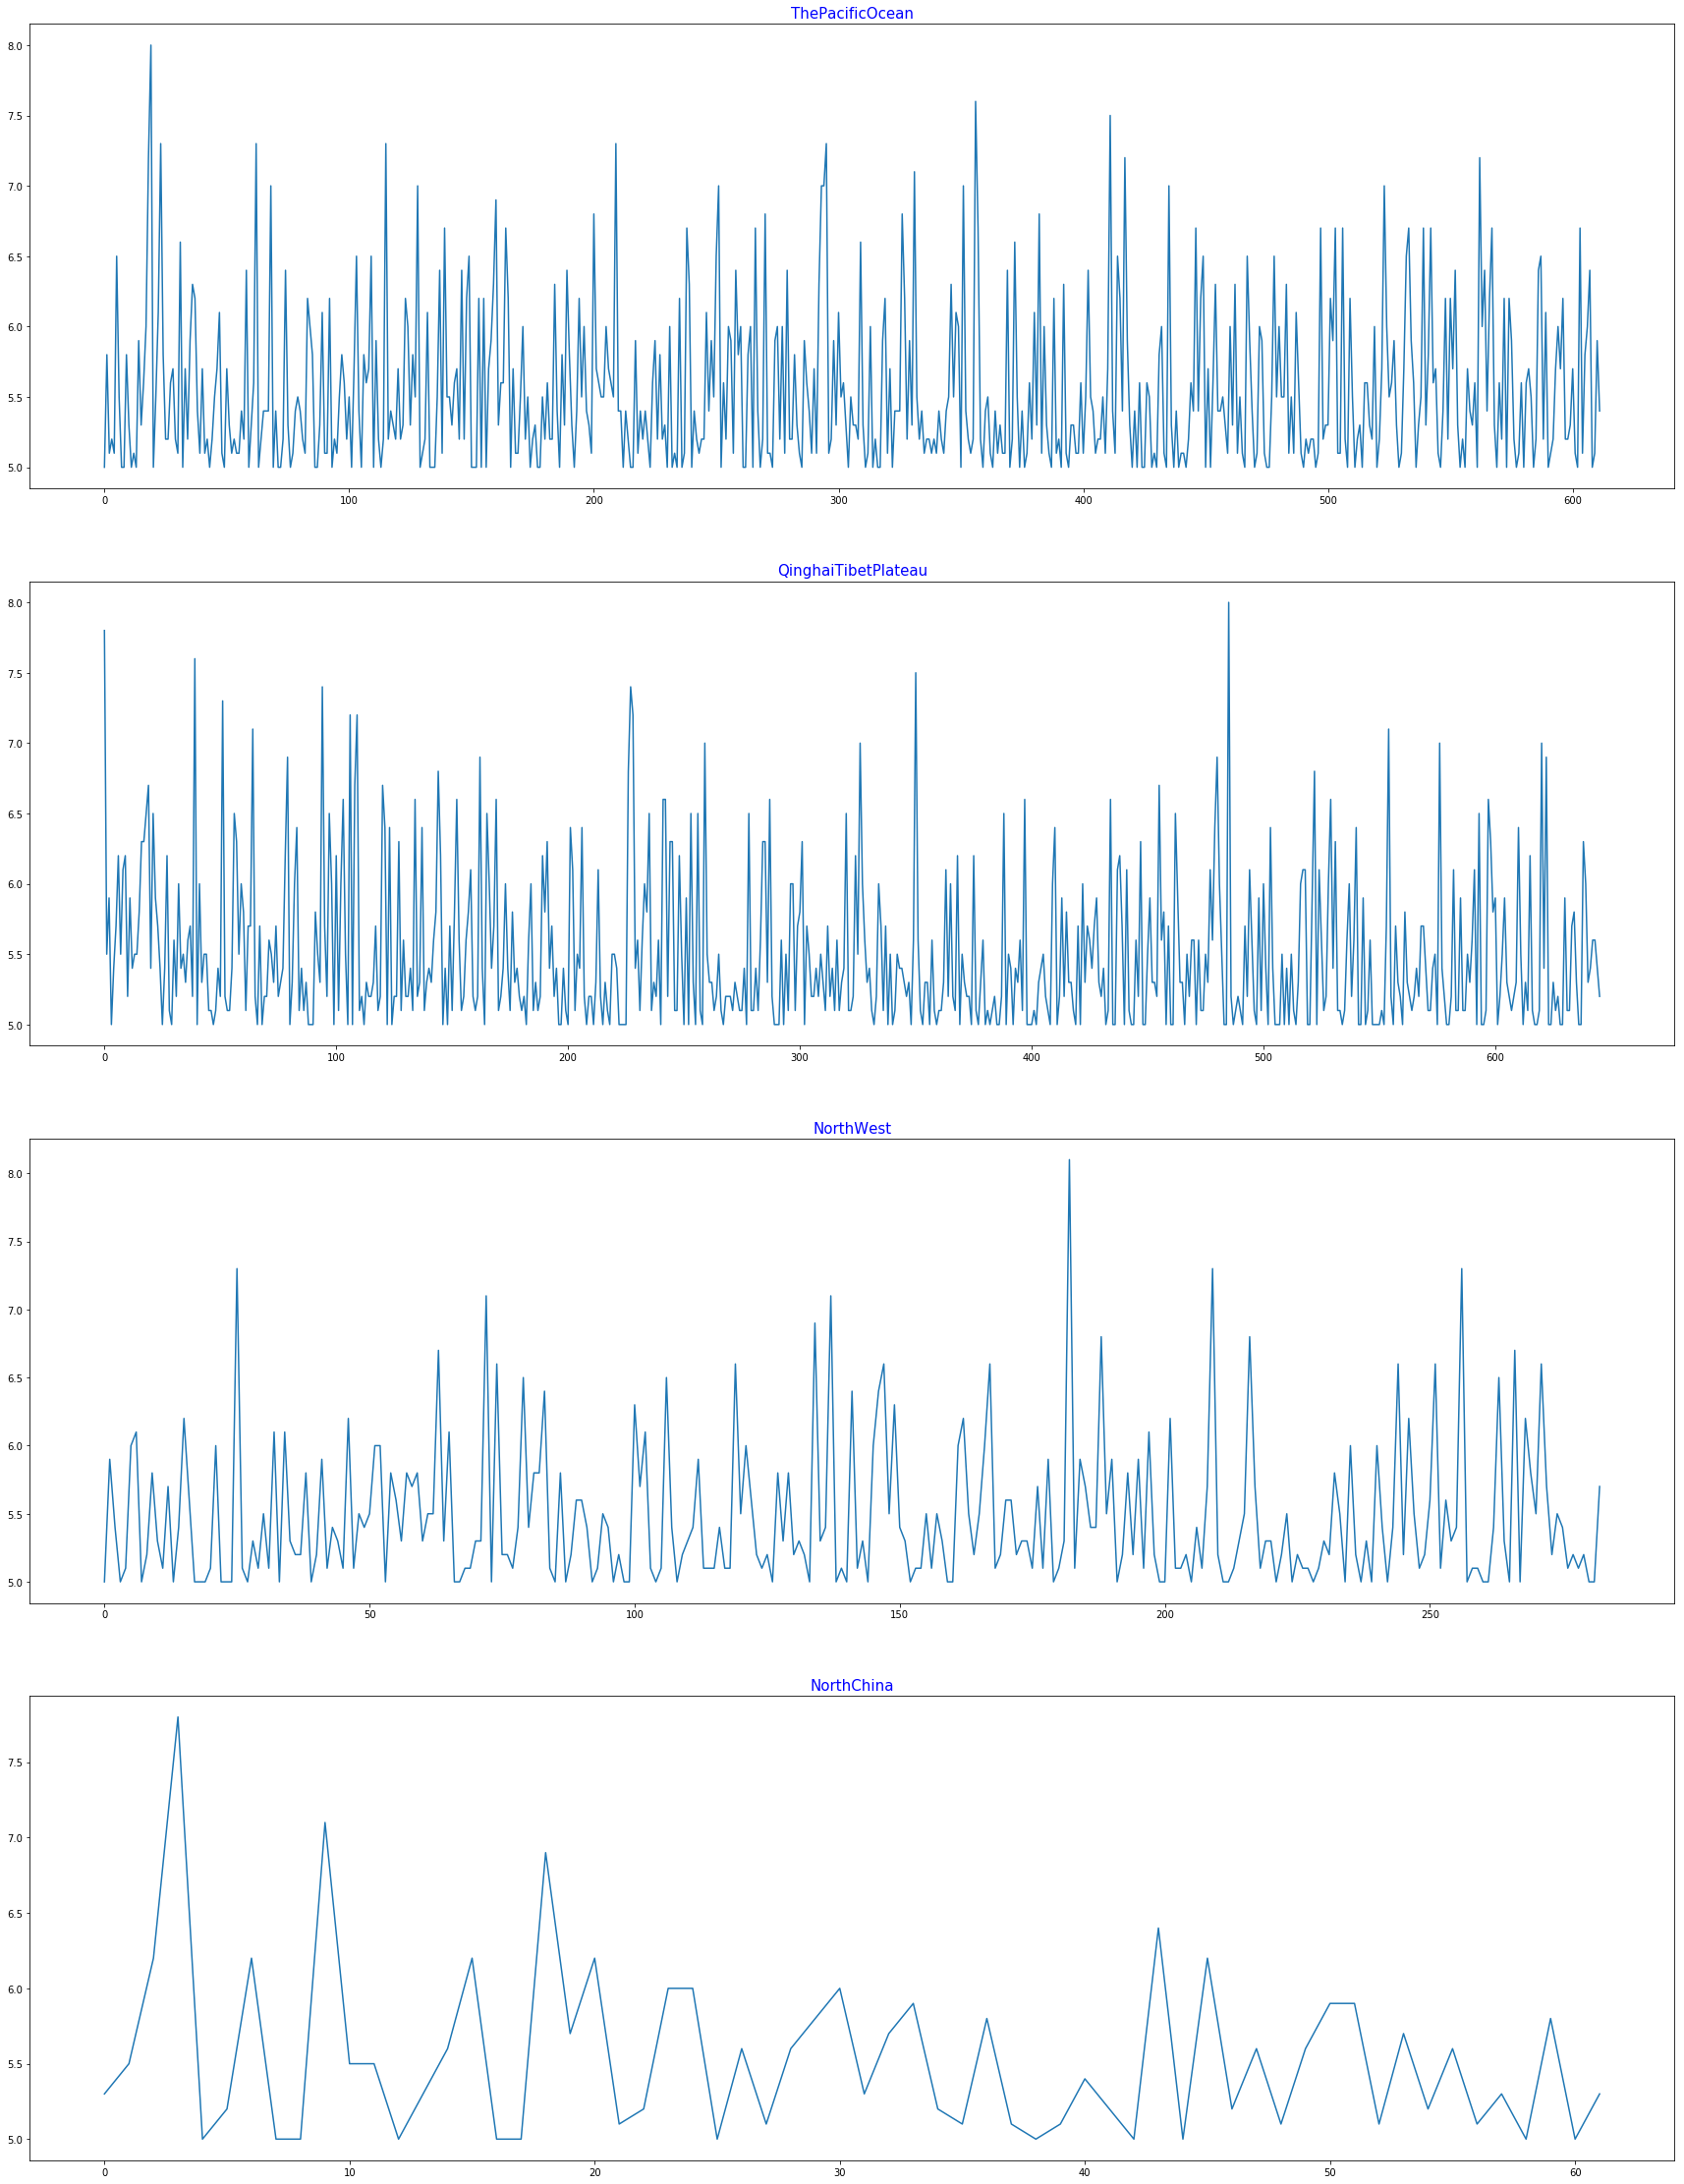

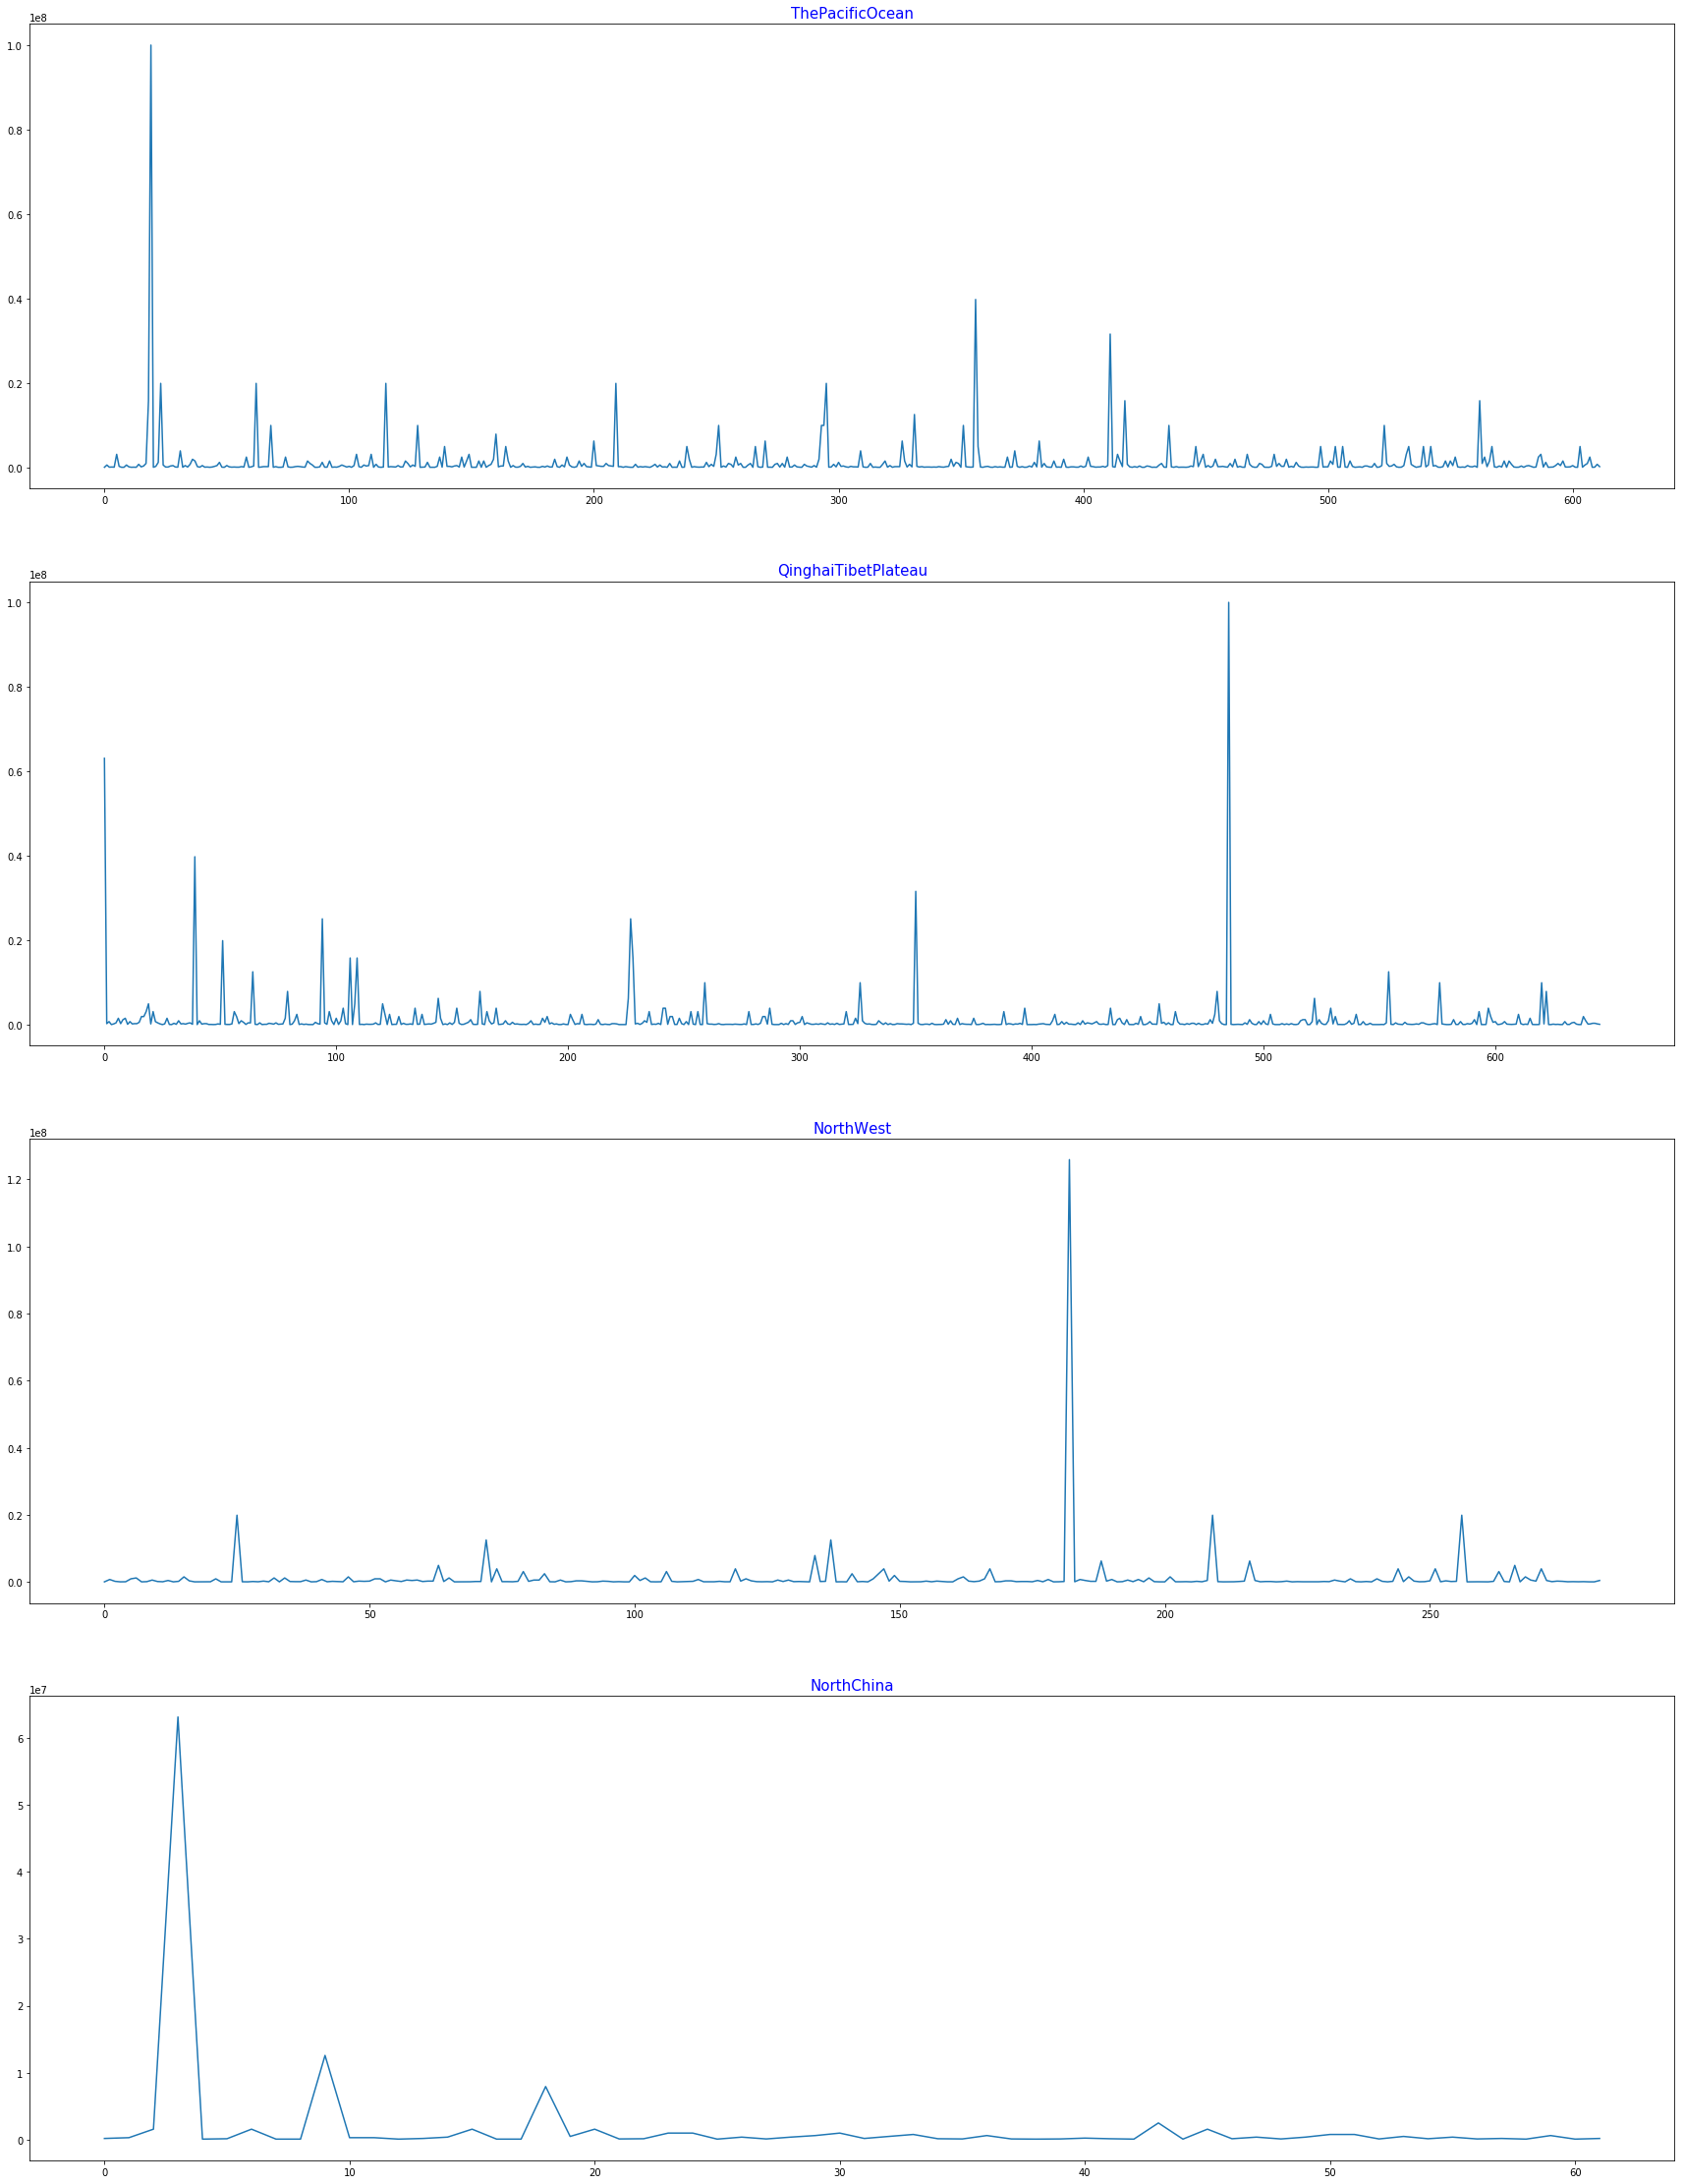

In [6]:
# 载入划分好的四个地震带数据（1970-2020），并可视化折线图
df_ThePacificOcean,data_ThePacificOcean = read_data('./data/earthquake/ThePacificOcean1970-2019.csv', 1, '震级')
df_QinghaiTibetPlateau,data_QinghaiTibetPlateau = read_data('./data/earthquake/QinghaiTibetPlateau1970-2019.csv', 1, '震级')
df_NorthWest,data_NorthWest = read_data('./data/earthquake/NorthWest1970-2019.csv', 1, '震级')
df_NorthChina,data_NorthChina = read_data('./data/earthquake/NorthChina1970-2019.csv', 1, '震级')
df_ThePacificOcean_energy,data_ThePacificOcean_energy = read_data('./data/earthquake/ThePacificOcean1970-2019.csv', 2, '能量')
df_QinghaiTibetPlateau_energy,data_QinghaiTibetPlateau_energy  = read_data('./data/earthquake/QinghaiTibetPlateau1970-2019.csv', 2, '能量')
df_NorthWest_energy,data_NorthWest_energy  = read_data('./data/earthquake/NorthWest1970-2019.csv', 2, '能量')
df_NorthChina_energy,data_NorthChina_energy  = read_data('./data/earthquake/NorthChina1970-2019.csv', 2, '能量')
print ("data_ThePacificOcean:%d"%len(data_ThePacificOcean))
print ("data_QinghaiTibetPlateau:%d"%len(data_QinghaiTibetPlateau)) 
print ("data_NorthWest:%d"%len(data_NorthWest)) 
print ("data_NorthChina:%d"%len(data_NorthChina)) 

show(data_ThePacificOcean,data_QinghaiTibetPlateau,data_NorthWest,data_NorthChina)
show(data_ThePacificOcean_energy,data_QinghaiTibetPlateau_energy,data_NorthWest_energy,data_NorthChina_energy)

In [9]:
# 自定义一阶差分处理
def diff_1(df,col):
    df['eq_diff_1'] =  df[col].diff(1)
    # 差分后出现了NaN，导致plt可视化时报错，进一步处理NaN值，去除即可
    df.dropna(axis=0, how='any', inplace=True)
    df.isnull().any() # 判断列是否有 NaN -> False 无
    return df

In [10]:
# 一阶差分
df_ThePacificOcean = diff_1(df_ThePacificOcean,'震级')
df_QinghaiTibetPlateau = diff_1(df_QinghaiTibetPlateau,'震级')
df_NorthWest = diff_1(df_NorthWest,'震级')
df_NorthChina = diff_1(df_NorthChina,'震级')
df_ThePacificOcean_energy = diff_1(df_ThePacificOcean_energy,'能量')
df_QinghaiTibetPlateau_energy = diff_1(df_QinghaiTibetPlateau_energy,'能量')
df_NorthWest_energy = diff_1(df_NorthWest_energy,'能量')
df_NorthChina_energy = diff_1(df_NorthChina_energy,'能量')

In [11]:
# 打印看看一阶差分结果
print(df_ThePacificOcean)
print(df_QinghaiTibetPlateau)
print(df_NorthWest)
print(df_NorthChina)
print(df_ThePacificOcean_energy)
print(df_QinghaiTibetPlateau_energy)
print(df_NorthWest_energy)
print(df_NorthChina_energy)

      震级  eq_diff_1
1    5.8        0.8
2    5.1       -0.7
3    5.2        0.1
4    5.1       -0.1
5    6.5        1.4
..   ...        ...
607  6.4        0.4
608  5.0       -1.4
609  5.1        0.1
610  5.9        0.8
611  5.4       -0.5

[611 rows x 2 columns]
      震级  eq_diff_1
1    5.5       -2.3
2    5.9        0.4
3    5.0       -0.9
4    5.4        0.4
5    5.7        0.3
..   ...        ...
641  5.4        0.1
642  5.6        0.2
643  5.6        0.0
644  5.4       -0.2
645  5.2       -0.2

[645 rows x 2 columns]
      震级  eq_diff_1
1    5.9        0.9
2    5.4       -0.5
3    5.0       -0.4
4    5.1        0.1
5    6.0        0.9
..   ...        ...
278  5.1       -0.1
279  5.2        0.1
280  5.0       -0.2
281  5.0        0.0
282  5.7        0.7

[282 rows x 2 columns]
     震级  eq_diff_1
1   5.5        0.2
2   6.2        0.7
3   7.8        1.6
4   5.0       -2.8
5   5.2        0.2
..  ...        ...
57  5.3        0.2
58  5.0       -0.3
59  5.8        0.8
60  5.0       -0.8

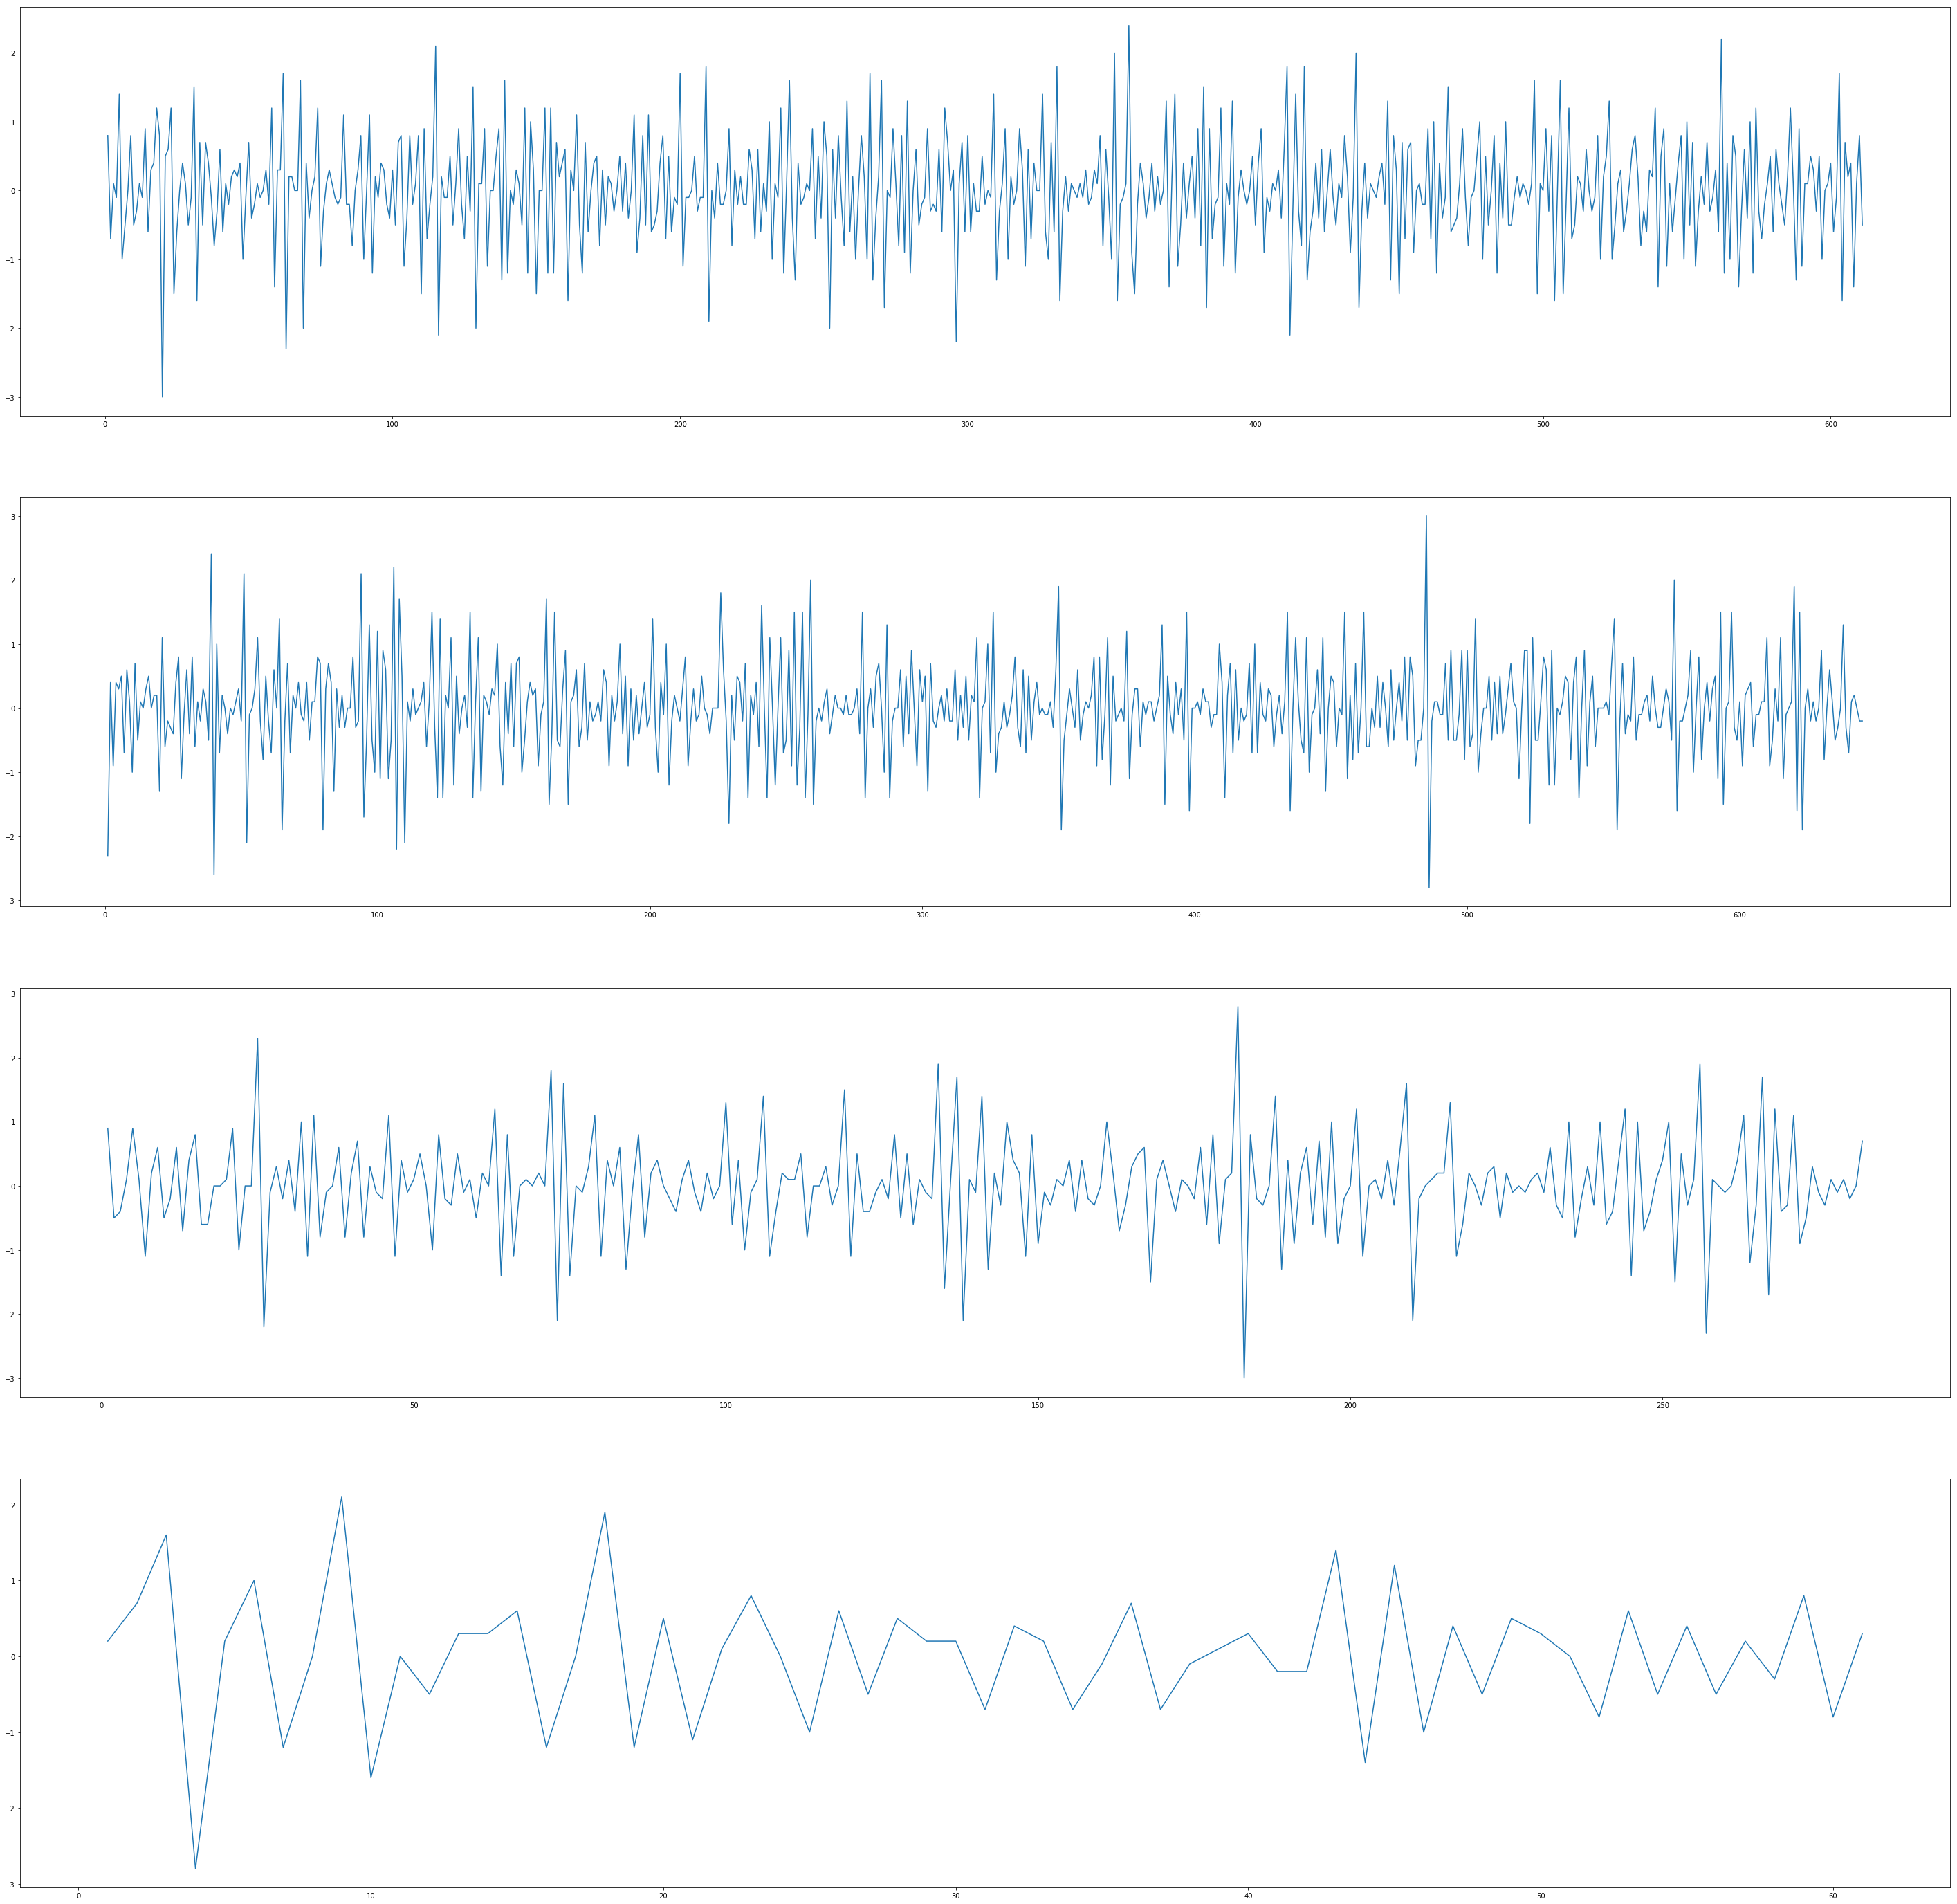

In [12]:
# 一阶差分可视化 
fig = plt.figure(figsize=(50,50))
ax1 = fig.add_subplot(411) # “131”表示“1×3网格，第一子图”
ax1.plot(df_ThePacificOcean['eq_diff_1'])
ax2 = fig.add_subplot(412)
ax2.plot(df_QinghaiTibetPlateau['eq_diff_1'])
ax3 = fig.add_subplot(413)
ax3.plot(df_NorthWest['eq_diff_1'])
ax4 = fig.add_subplot(414)
ax4.plot(df_NorthChina['eq_diff_1'])
plt.show()

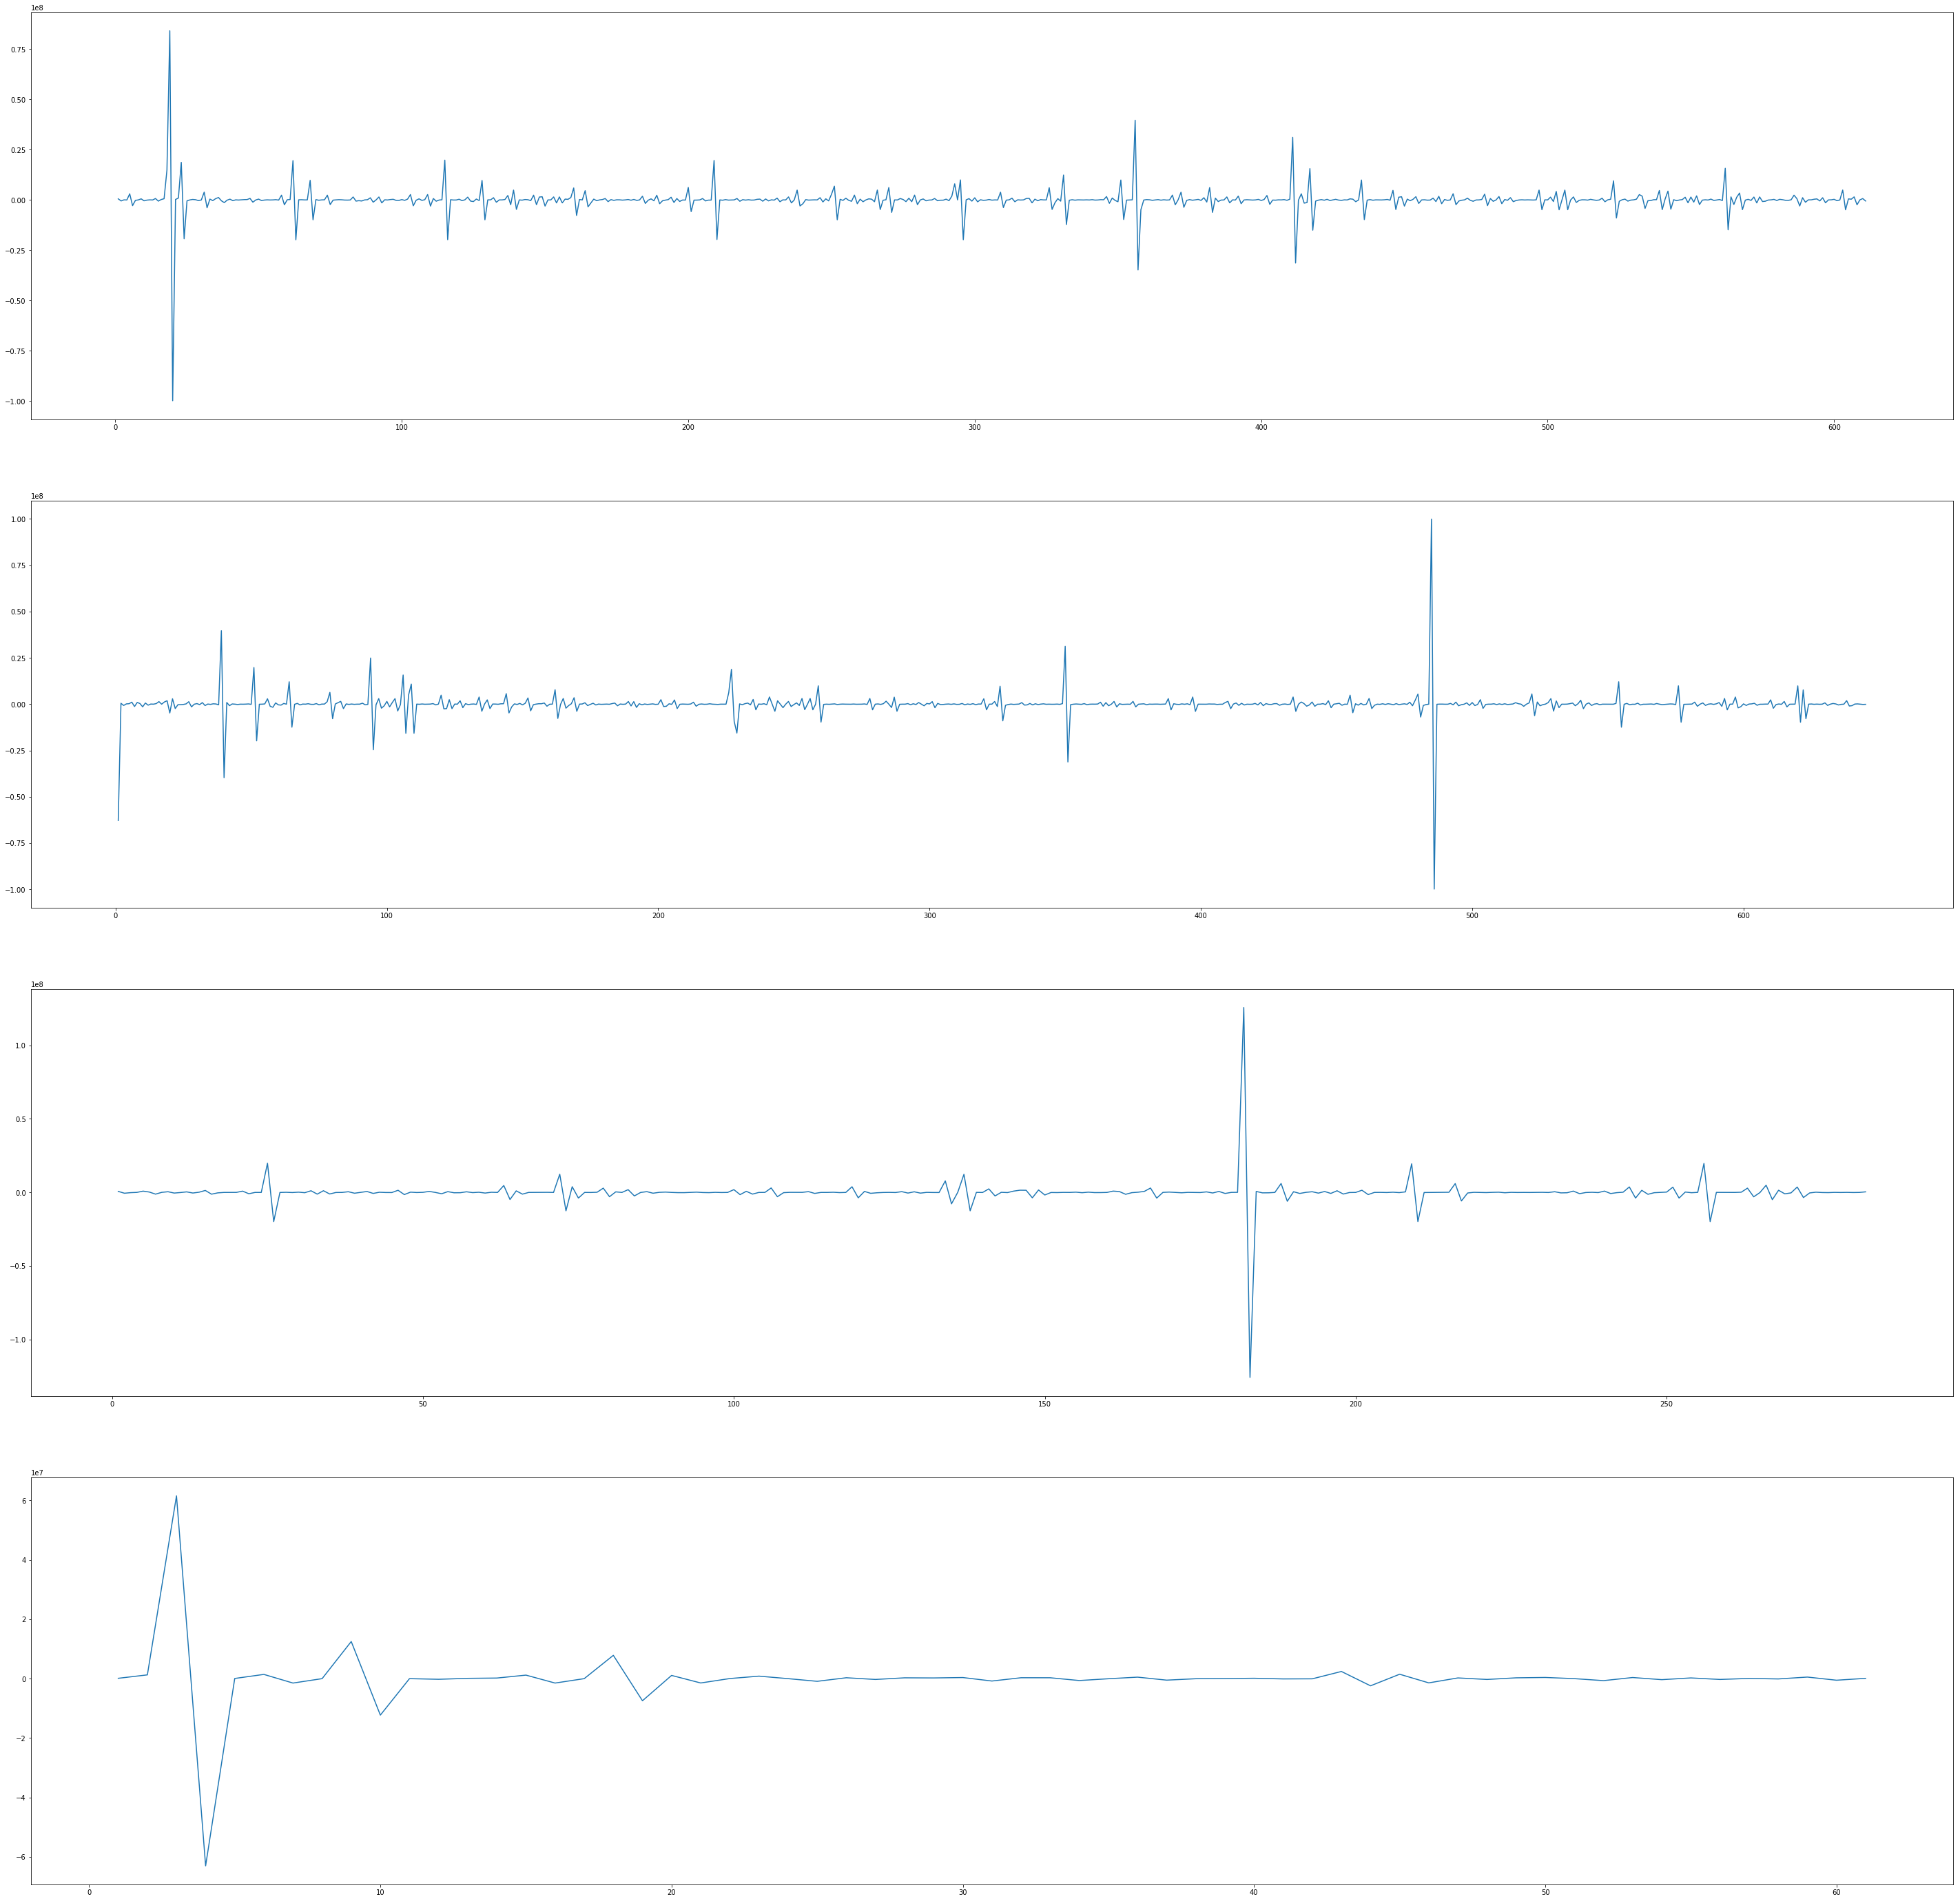

In [14]:
fig = plt.figure(figsize=(50,50))
ax1 = fig.add_subplot(411) # “131”表示“1×3网格，第一子图”
ax1.plot(df_ThePacificOcean_energy['eq_diff_1'])
ax2 = fig.add_subplot(412)
ax2.plot(df_QinghaiTibetPlateau_energy['eq_diff_1'])
ax3 = fig.add_subplot(413)
ax3.plot(df_NorthWest_energy['eq_diff_1'])
ax4 = fig.add_subplot(414)
ax4.plot(df_NorthChina_energy['eq_diff_1'])
plt.show()

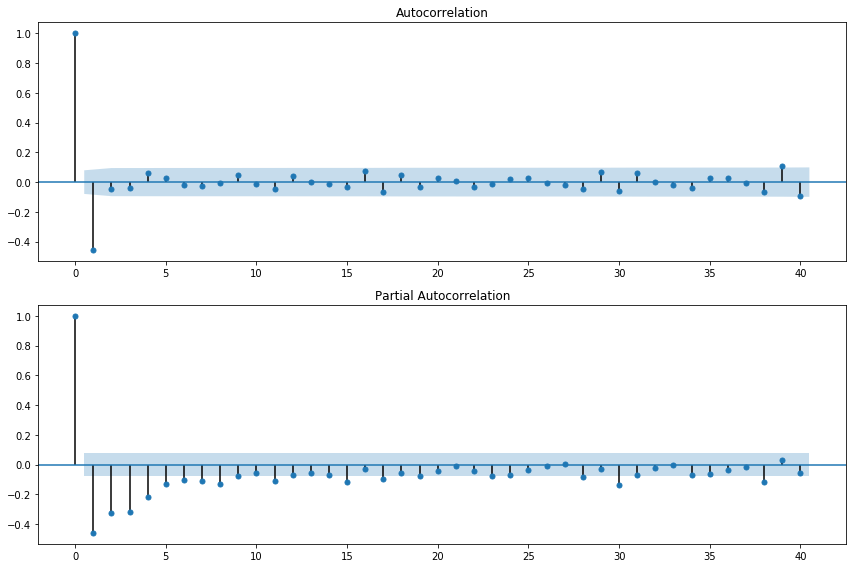

In [15]:
# 绘制
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ThePacificOcean['eq_diff_1'], lags=40,ax=ax1) # 绘制自相关图，延迟值设置为20，y轴表示相关性（-1，1）
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ThePacificOcean['eq_diff_1'], lags=40, ax=ax2) # 绘制偏自相关图，延迟值设置为20
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

In [16]:
# 做了差分处理 （结果来看 MA（1）最佳）
arma_mod1 = sm.tsa.ARMA(df_ThePacificOcean['eq_diff_1'],(0,1)).fit() # MA（1）
print(arma_mod1.aic, arma_mod1.bic, arma_mod1.hqic)
arma_mod2 = sm.tsa.ARMA(df_ThePacificOcean['eq_diff_1'],(1,1)).fit() # ARMA（1，1）
print(arma_mod2.aic, arma_mod2.bic, arma_mod2.hqic)
arma_mod3 = sm.tsa.ARMA(df_ThePacificOcean['eq_diff_1'],(1,0)).fit() # AR(1)
print(arma_mod3.aic, arma_mod3.bic, arma_mod3.hqic)

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1043.5246021594571 1056.769893036972 1048.6765268338538


d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1044.7617670376085 1062.4221548742948 1051.630999936804
1294.9343094526498 1308.1796003301647 1300.0862341270465


d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


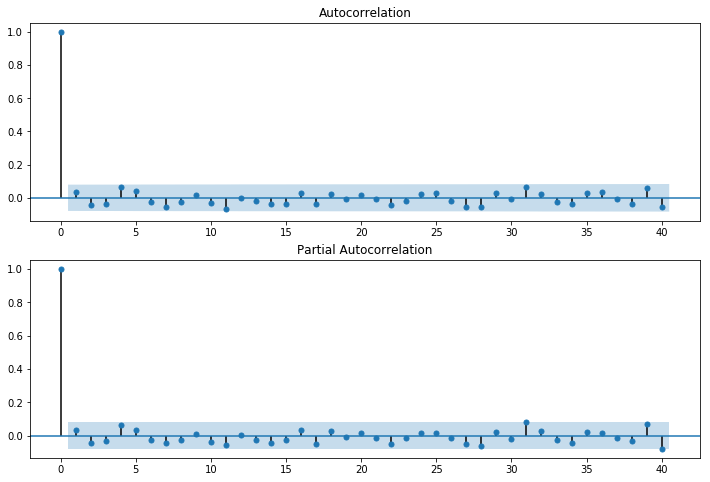

In [17]:
# 做了差分处理-残差验证
resid = arma_mod1.resid 
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40,ax=ax2)

In [18]:
# 德宾-沃森（D-W）检验
print(sm.stats.durbin_watson(arma_mod1.resid.values))
# 1.9260118230469343 -> 残差不存在自相关性

1.9260118230469343


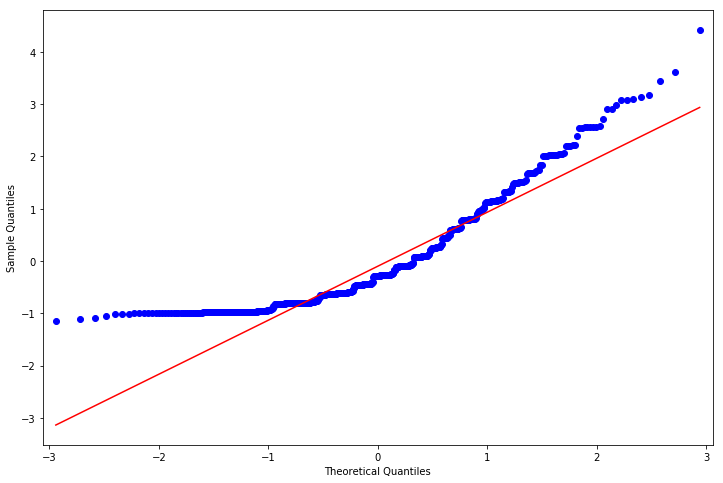

In [19]:
from statsmodels.graphics.api import qqplot
# 观察是否符合正态分布,这里用qq图
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q',ax=ax, fit=True)

In [ ]:
# 根据AIC、BIC自动选择最佳模型
train_results = sm.tsa.arma_order_select_ic(df_ThePacificOcean['震级'], ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)
#AIC（1，1）、BIC（1，1） -> 选择ARMA(1,1)模型

In [20]:
# 自定义MA（1）模型，指定一阶差分
def model_MA(df,str):
    model = sm.tsa.ARIMA(df[str], order=(0, 1, 1)) # MA(1）模型 ，指定一阶差分
    results = model.fit()
    predict_sunspots = results.predict(dynamic=False)
    fig, ax = plt.subplots(figsize=(50, 8))
    ax = df['eq_diff_1'].plot(ax=ax)
    predict_sunspots.plot(ax=ax)
    plt.show()
    return results

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


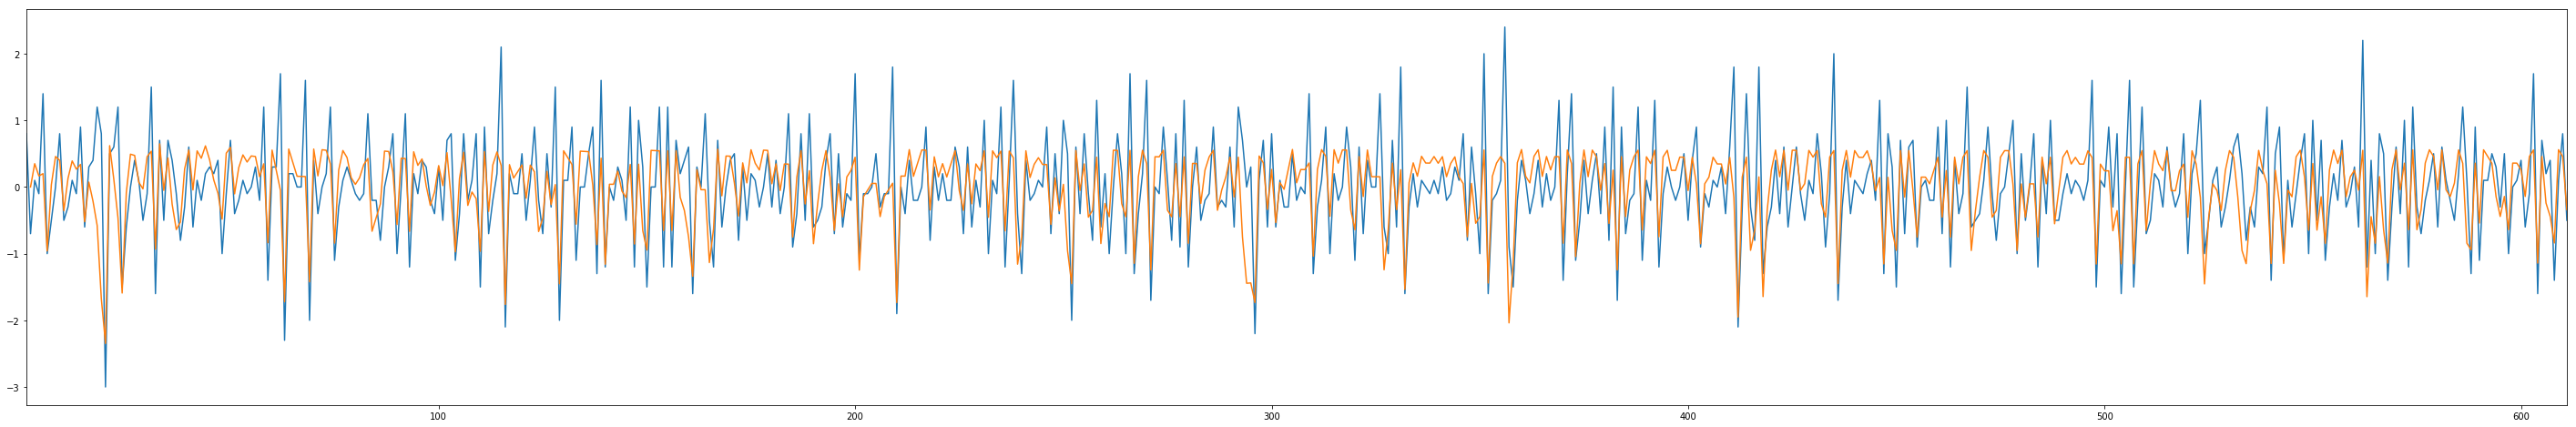

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


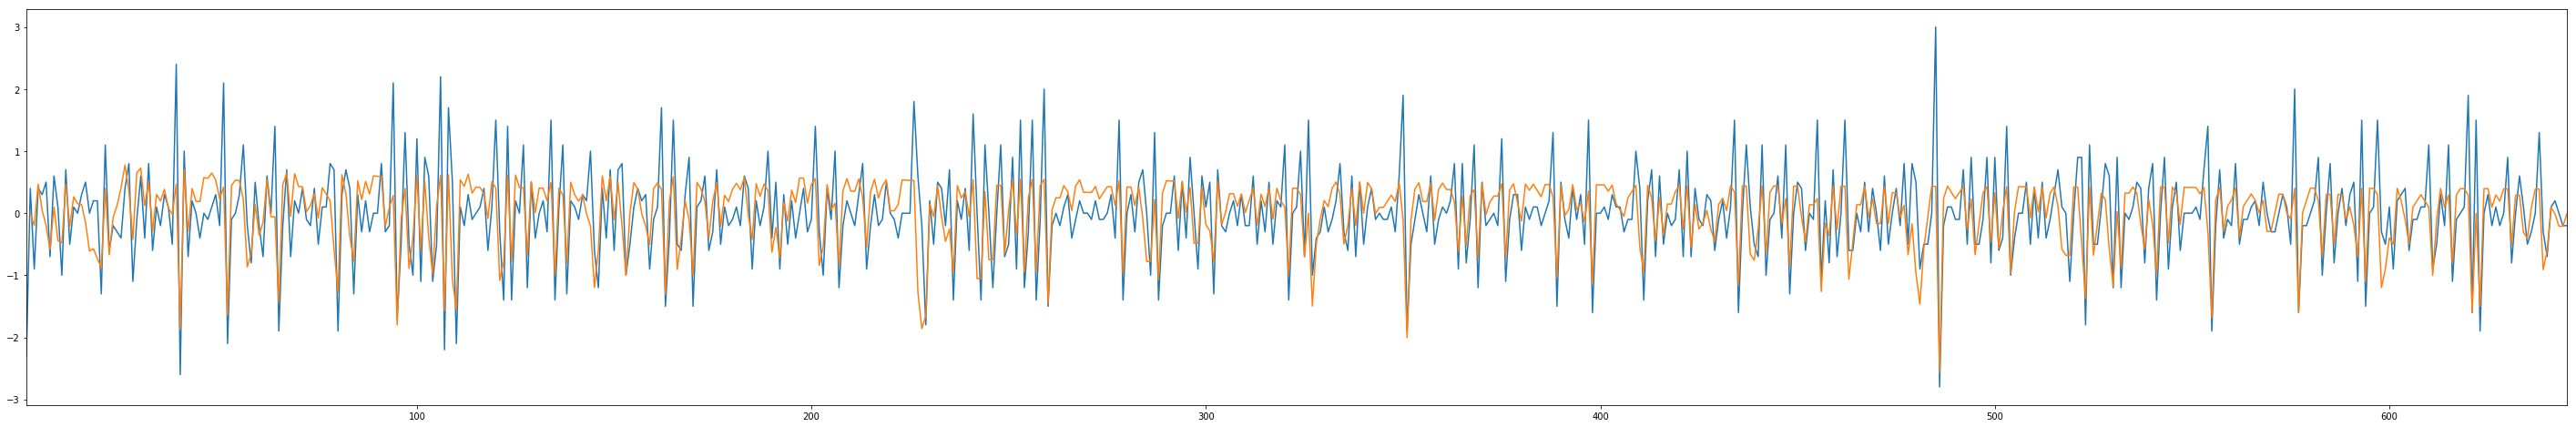

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


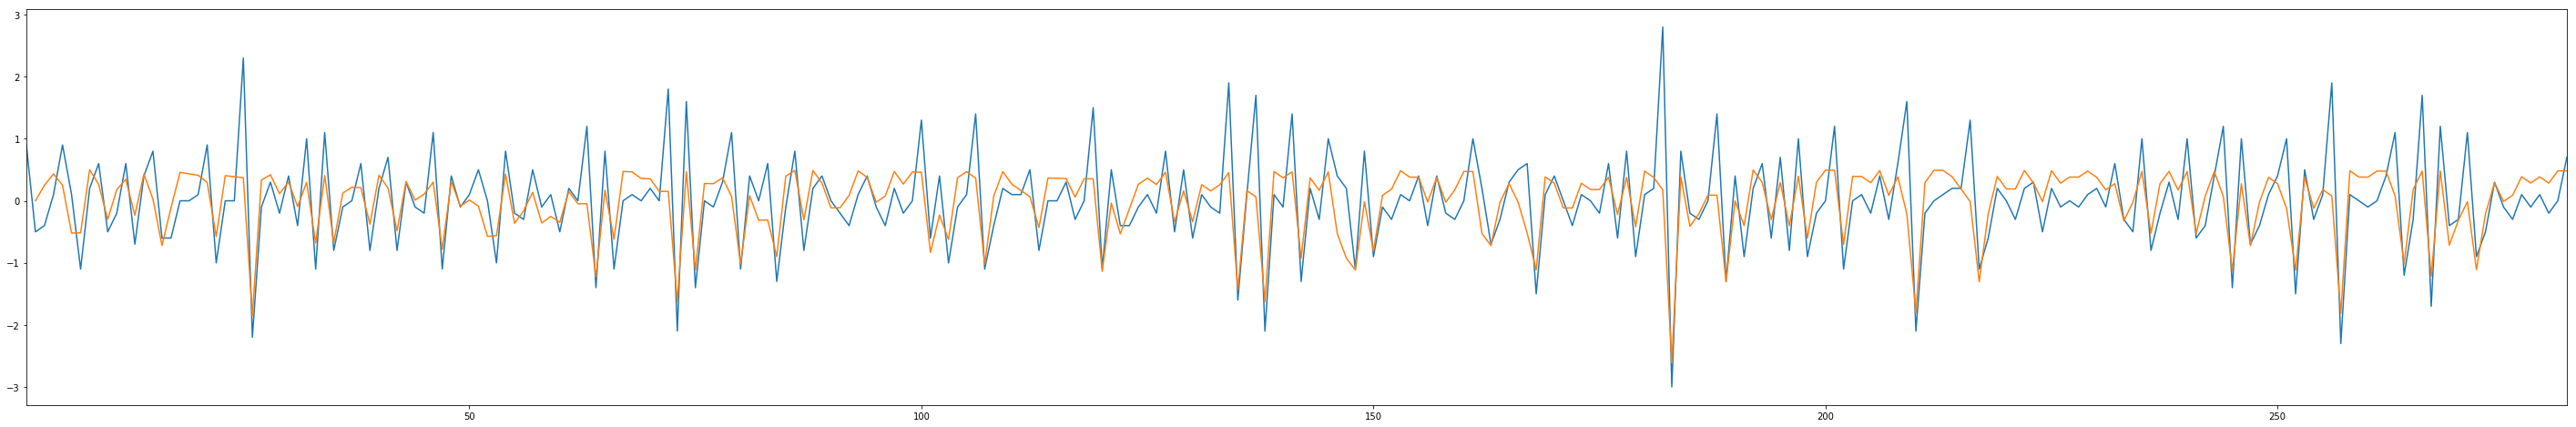

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


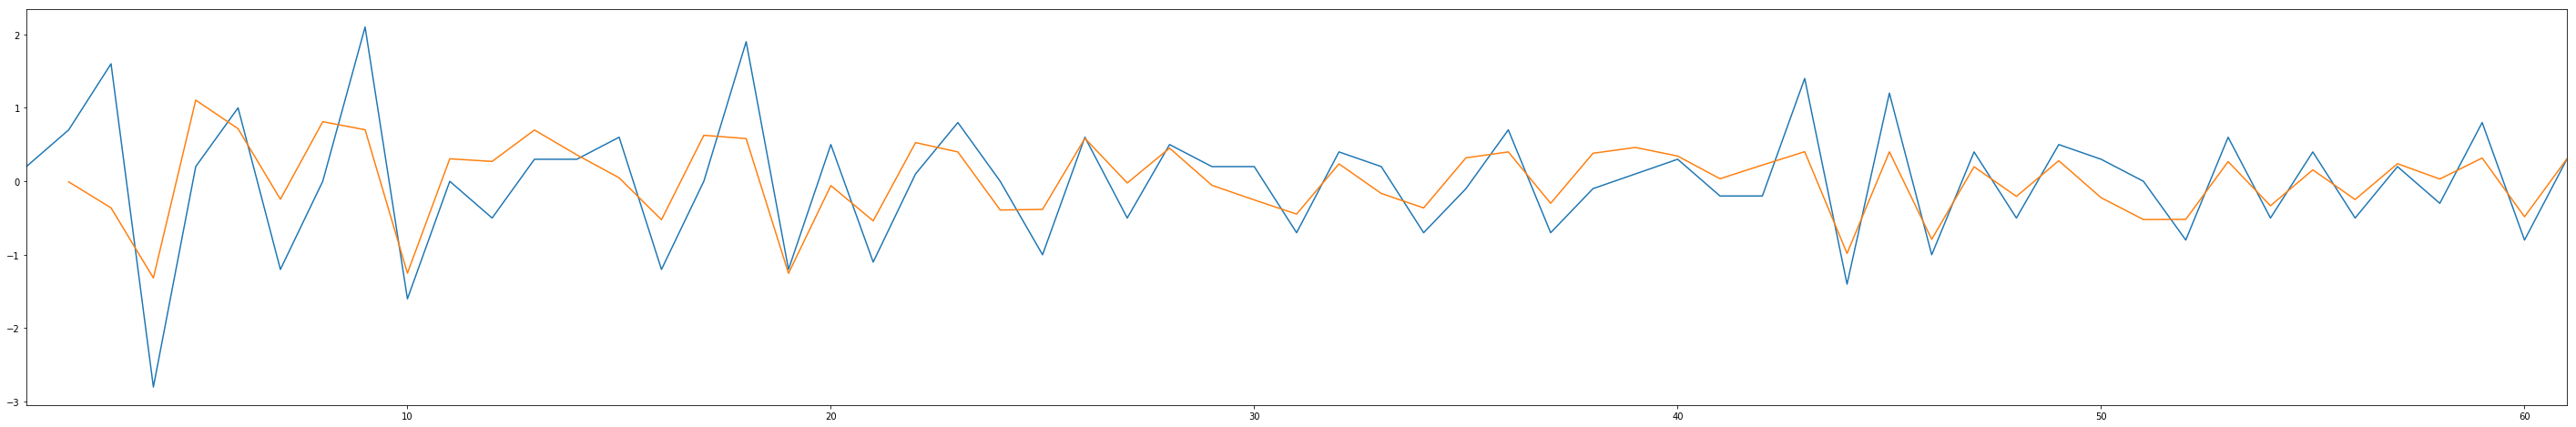

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


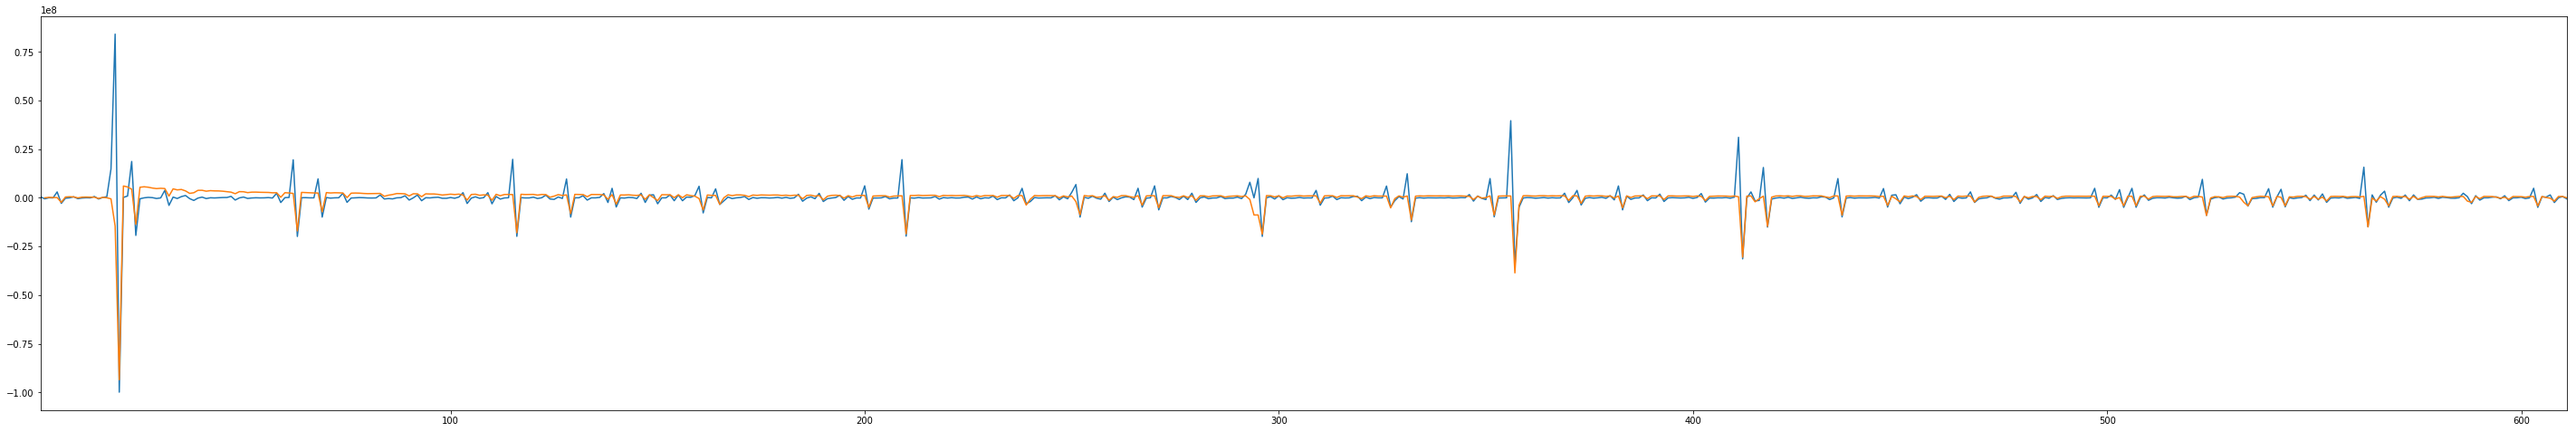

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


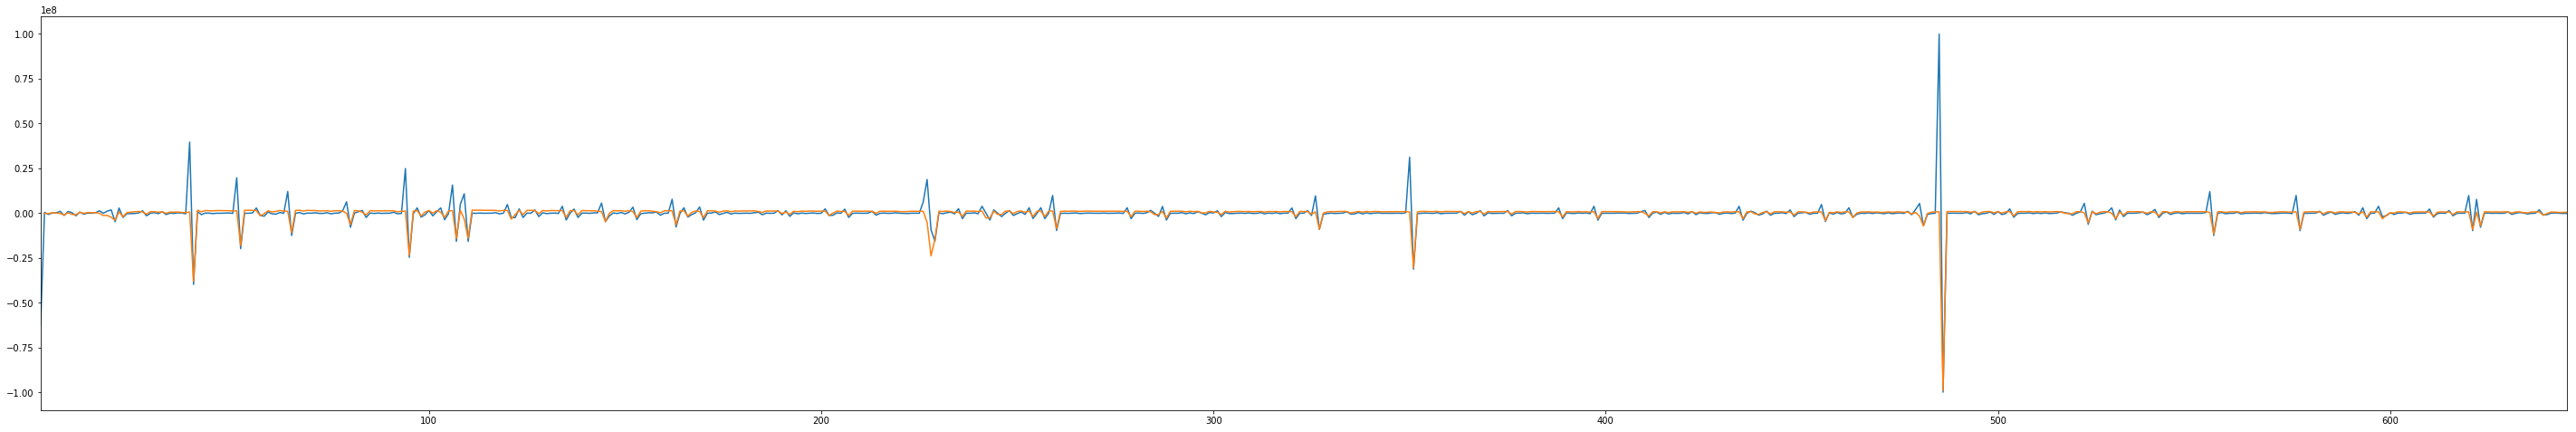

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


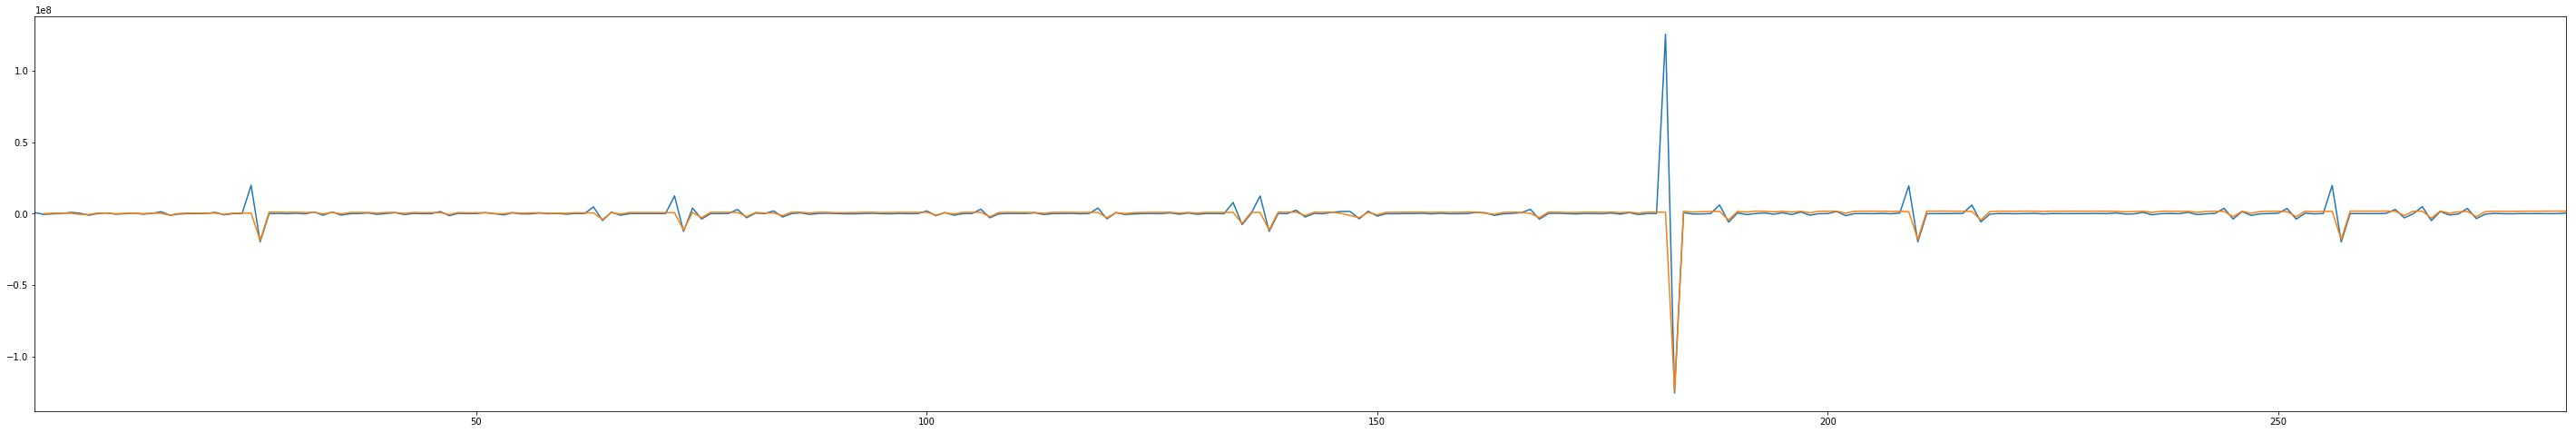

d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
d:\forpython\anaconda\envs\pytorch\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


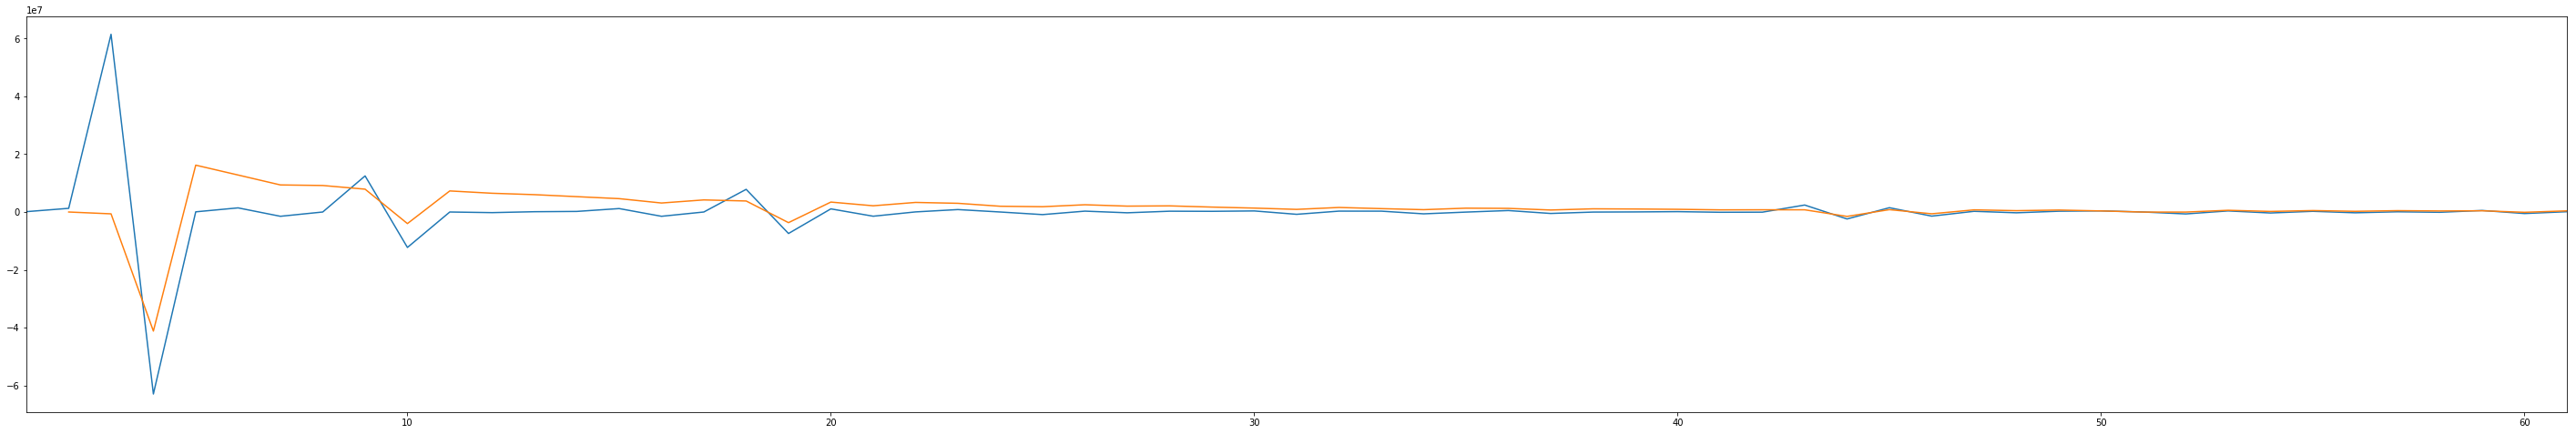

In [22]:
# 调用模型并输出结果
results_ThePacificOcean = model_MA(df_ThePacificOcean,'震级')
results_QinghaiTibetPlateau = model_MA(df_QinghaiTibetPlateau,'震级')
results_NorthWest = model_MA(df_NorthWest,'震级')
results_NorthChina = model_MA(df_NorthChina,'震级')
results_ThePacificOcean_ey = model_MA(df_ThePacificOcean_energy,'能量')
results_QinghaiTibetPlateau_ey = model_MA(df_QinghaiTibetPlateau_energy,'能量')
results_NorthWest_ey = model_MA(df_NorthWest_energy,'能量')
results_NorthChina_ey = model_MA(df_NorthChina_energy,'能量')

In [30]:
# 根据震级预测
from sklearn.metrics import mean_squared_error # 均方误差
import numpy as np

# 预测2020年环太平洋地震带连续5次地震震级
y_pred1 = results_ThePacificOcean.forecast(5)[0] 
print(y_pred1)
df,y_true = read_data('./data/earthquake/ThePacificOcean_2020.csv', 0, '震级') 
y_true = y_true[0:5] # 取前5个值
print(y_true)
# 计算均方误差
print(mean_squared_error(y_true, y_pred1))

# 预测2020年青藏高原地震带连续5次地震震级
y_pred2 = results_QinghaiTibetPlateau.forecast(5)[0]
print(y_pred2)
df,y_true = read_data('./data/earthquake/QinghaiTibetPlateau_2020.csv', 0, '震级') 
y_true = y_true[0:5] # 取前5个值
print(y_true)
# 计算均方误差
print(mean_squared_error(y_true, y_pred2))

# 预测2020年西北地震带后5次地震震级
y_pred3 = results_NorthWest.forecast(5)[0]
print(y_pred3)
df,y_true = read_data('./data/earthquake/NorthWest_2020.csv', 0, '震级') 
y_true = y_true[0:5] # 取前5个值
print(y_true)
# 计算均方误差
print(mean_squared_error(y_true, y_pred3))

# 预测2020年华北地震带后1次地震震级 
y_pred4 = y_pred = results_NorthChina.forecast(1)[0]
print(y_pred4)
df,y_true = read_data('./data/earthquake/NorthChina_2020.csv', 0, '震级') 
print(y_true)

[5.5592684  5.55930455 5.5593407  5.55937684 5.55941299]
0    5.3
1    5.4
2    5.8
3    5.1
4    5.4
Name: 震级, dtype: float64
0.07739090579433142
[5.38928747 5.38894621 5.38860496 5.3882637  5.38792245]
0    5.1
1    5.1
2    5.0
3    5.0
4    5.1
Name: 震级, dtype: float64
0.11036780041968539
[5.48173346 5.48178017 5.48182687 5.48187357 5.48192028]
0    5.6
1    5.4
2    6.4
3    5.2
4    5.1
Name: 震级, dtype: float64
0.21780653547372014
[5.29629898]
0    5.1
Name: 震级, dtype: float64


In [31]:
# 根据能量预测

# 预测2020年环太平洋地震带连续5次地震震级
y_pred1 = results_ThePacificOcean_ey.forecast(5)[0] 
y_pred1 = np.log10(y_pred1)
print(y_pred1)
df,y_true = read_data('./data/earthquake/ThePacificOcean_2020.csv', 0, '震级') 
y_true = y_true[0:5] # 取前5个值
print(y_true)
# 计算均方误差
print(mean_squared_error(y_true, y_pred1))

# 预测2020年青藏高原地震带连续5次地震震级
y_pred2 = results_QinghaiTibetPlateau_ey.forecast(5)[0]
y_pred2 = np.log10(y_pred2)
print(y_pred2)
df,y_true = read_data('./data/earthquake/QinghaiTibetPlateau_2020.csv', 0, '震级') 
y_true = y_true[0:5] # 取前5个值
print(y_true)
# 计算均方误差
print(mean_squared_error(y_true, y_pred2))

# 预测2020年西北地震带后5次地震震级
y_pred3 = results_NorthWest_ey.forecast(5)[0]
y_pred3 = np.log10(y_pred3)
print(y_pred3)
df,y_true = read_data('./data/earthquake/NorthWest_2020.csv', 0, '震级') 
y_true = y_true[0:5] # 取前5个值
print(y_true)
# 计算均方误差
print(mean_squared_error(y_true, y_pred3))

# 预测2020年华北地震带后1次地震震级 
y_pred4 = y_pred = results_NorthChina_ey.forecast(1)[0]
y_pred4 = np.log10(y_pred4)
print(y_pred4)
df,y_true = read_data('./data/earthquake/NorthChina_2020.csv', 0, '震级') 
print(y_true)

[5.90576605 5.90486306 5.90395819 5.90305143 5.90214277]
0    5.3
1    5.4
2    5.8
3    5.1
4    5.4
Name: 震级, dtype: float64
0.3059370954104331
[5.92039584 5.91987059 5.91934471 5.91881819 5.91829103]
0    5.1
1    5.1
2    5.0
3    5.0
4    5.1
Name: 震级, dtype: float64
0.740851776235264
[6.26767835 6.26855423 6.26942834 6.2703007  6.27117131]
0    5.6
1    5.4
2    6.4
3    5.2
4    5.1
Name: 震级, dtype: float64
0.7468831240610937
[5.67234549]
0    5.1
Name: 震级, dtype: float64
